In [1]:
### model1 전처리 ###

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'C:/Users/Lenovo/Downloads/model1.csv'
data1 = pd.read_csv(file_path)

data1.head()

,"last_name, first_name",player_id,year,pa,k_percent,bb_percent,isolated_power,xba,woba,xiso,...,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed
0,"Cabrera, Miguel",408234,2021,526,22.4,7.6,0.130,0.234,0.305,0.186,...,91.4,10.0,32.8,8.3,49.0,101.953387,95.613068,21.5,5.01,24.0
1,"Molina, Yadier",425877,2021,473,16.7,5.1,0.118,0.255,0.290,0.151,...,88.0,15.3,34.1,5.2,31.6,97.653775,92.936144,21.7,4.92,22.8
2,"Cruz Jr., Nelson",443558,2021,584,21.6,8.7,0.232,0.264,0.346,0.248,...,92.9,11.8,31.8,13.6,52.5,105.497885,97.364589,22.0,4.69,26.0
3,"Peralta, David",444482,2021,538,17.1,8.6,0.143,0.243,0.314,0.103,...,89.3,5.3,27.2,5.0,41.8,101.204663,94.748490,23.2,4.38,27.6
4,"Escobar, Alcides",444876,2021,349,16.0,4.9,0.116,0.271,0.325,0.091,...,81.7,11.1,36.3,3.0,21.0,93.737836,91.096948,28.8,4.36,27.5


In [3]:
# No missing data
missing_data = data1.isnull().sum()
missing_data

last_name, first_name    0
player_id                0
year                     0
pa                       0
k_percent                0
bb_percent               0
isolated_power           0
xba                      0
woba                     0
xiso                     0
wobacon                  0
xwobacon                 0
xbacon                   0
exit_velocity_avg        0
launch_angle_avg         0
sweet_spot_percent       0
barrel_batted_rate       0
hard_hit_percent         0
avg_best_speed           0
avg_hyper_speed          0
linedrives_percent       0
hp_to_1b                 0
sprint_speed             0
dtype: int64

In [4]:
# Getting rid of columns we don't need
data1 = data1.drop(columns=['last_name, first_name', 'year', 'pa'], errors='ignore')

In [5]:
columns_of_interest = ['k_percent', 'bb_percent', 'isolated_power', 'xba', 'woba', 'xiso','wobacon', 'xwobacon', 'xbacon',
    'exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent', 
    'barrel_batted_rate', 'hard_hit_percent', 'avg_best_speed', 'avg_hyper_speed',
    'linedrives_percent', 'hp_to_1b', 'sprint_speed']

# Subsetting the data to these columns
selected_data = data1[columns_of_interest]

# Displaying a snapshot of selected columns to confirm selection
selected_data.head()

,k_percent,bb_percent,isolated_power,xba,woba,xiso,wobacon,xwobacon,xbacon,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed
0,22.4,7.6,0.130,0.234,0.305,0.186,0.356,0.372,0.312,91.4,10.0,32.8,8.3,49.0,101.953387,95.613068,21.5,5.01,24.0
1,16.7,5.1,0.118,0.255,0.290,0.151,0.321,0.343,0.310,88.0,15.3,34.1,5.2,31.6,97.653775,92.936144,21.7,4.92,22.8
2,21.6,8.7,0.232,0.264,0.346,0.248,0.414,0.439,0.353,92.9,11.8,31.8,13.6,52.5,105.497885,97.364589,22.0,4.69,26.0
3,17.1,8.6,0.143,0.243,0.314,0.103,0.343,0.315,0.300,89.3,5.3,27.2,5.0,41.8,101.204663,94.748490,23.2,4.38,27.6
4,16.0,4.9,0.116,0.271,0.325,0.091,0.356,0.335,0.328,81.7,11.1,36.3,3.0,21.0,93.737836,91.096948,28.8,4.36,27.5


In [6]:
# Performing correlation analysis on the selected variables to see their relation with 'woba'
correlation_matrix = selected_data.corr()

# Extracting correlations of each feature with 'woba' for targeted insight
woba_correlations = correlation_matrix['woba'].sort_values(ascending=False)
woba_correlations

woba                  1.000000
wobacon               0.793143
isolated_power        0.755057
xiso                  0.685940
xwobacon              0.657593
xbacon                0.636695
xba                   0.609533
barrel_batted_rate    0.571757
avg_hyper_speed       0.548462
exit_velocity_avg     0.546478
hard_hit_percent      0.535382
avg_best_speed        0.529912
bb_percent            0.465344
sweet_spot_percent    0.333362
linedrives_percent    0.160668
launch_angle_avg      0.129969
sprint_speed         -0.007732
hp_to_1b             -0.008745
k_percent            -0.091422
Name: woba, dtype: float64

In [7]:
# Assuming `selected_data` is already extracted from the dataset
# Handling outliers by capping them at the 1st and 99th percentiles
for column in selected_data.columns:
    lower_bound = np.percentile(selected_data[column], 1)
    upper_bound = np.percentile(selected_data[column], 99)
    selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)

# Displaying summary statistics after outlier handling
selected_data.describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17780\3252109571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17780\3252109571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17780\3252109571.py:6: SettingWithCopyWarning: 
A value is trying to be set o

,k_percent,bb_percent,isolated_power,xba,woba,xiso,wobacon,xwobacon,xbacon,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,21.910644,8.476565,0.166626,0.249356,0.320854,0.165396,0.375493,0.377023,0.330535,89.071463,13.031216,33.985249,8.339628,39.963599,99.952511,94.235993,23.920583,4.467065,27.297496
std,5.716803,2.801871,0.053015,0.024503,0.034659,0.053655,0.053574,0.052554,0.029617,2.115698,4.521335,3.593069,4.049616,7.224418,2.356601,1.375763,2.858725,0.194473,1.321672
min,10.017000,3.200000,0.060340,0.191340,0.245000,0.066000,0.266170,0.277170,0.269170,84.117000,2.800000,25.734000,1.117000,21.634000,94.484371,91.302907,16.951000,4.110000,23.700000
25%,17.725000,6.400000,0.127000,0.233000,0.298000,0.127250,0.338000,0.338000,0.310000,87.700000,10.000000,31.500000,5.200000,35.400000,98.371044,93.285052,21.825000,4.330000,26.400000
50%,21.600000,8.300000,0.162000,0.249000,0.319500,0.161000,0.370000,0.372000,0.329000,89.000000,13.150000,34.000000,7.900000,40.150000,99.887999,94.154369,23.900000,4.430000,27.400000
75%,25.800000,10.300000,0.201000,0.265000,0.343000,0.200000,0.410000,0.413000,0.350000,90.400000,16.100000,36.375000,10.975000,44.900000,101.441696,95.073982,25.900000,4.600000,28.300000
max,35.183000,15.900000,0.311980,0.312830,0.419000,0.316660,0.529660,0.526320,0.411830,94.566000,22.600000,42.900000,20.100000,55.883000,106.095136,98.129434,30.900000,5.036600,30.100000


In [8]:
# Identify highly correlated factors and decide between MinMax and normalization.
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
scaling_method = 'MinMaxScaler' if not highly_correlated_pairs.empty else 'StandardScaler'

highly_correlated_pairs

isolated_power      xiso                  0.893237
                    wobacon               0.833247
                    barrel_batted_rate    0.845054
xiso                isolated_power        0.893237
                    xwobacon              0.919534
                    barrel_batted_rate    0.946862
                    avg_hyper_speed       0.807653
wobacon             isolated_power        0.833247
                    xwobacon              0.873522
                    barrel_batted_rate    0.806353
xwobacon            xiso                  0.919534
                    wobacon               0.873522
                    xbacon                0.910356
                    barrel_batted_rate    0.922148
                    hard_hit_percent      0.814620
                    avg_best_speed        0.830513
                    avg_hyper_speed       0.841671
xbacon              xwobacon              0.910356
exit_velocity_avg   hard_hit_percent      0.934119
                    avg_best_sp

In [9]:
scaling_method

'MinMaxScaler'

In [10]:
# Creating new derived features based on highly correlated pairs insights

# Power Contact: combining isolated power, xiso, and barrel batted rate
selected_data['power_contact'] = (
    selected_data['isolated_power'] + selected_data['xiso'] + selected_data['barrel_batted_rate']
)

# Velocity Strength: averaging exit velocity, best speed, and hyper speed
selected_data['velocity_strength'] = (
    selected_data['exit_velocity_avg'] + selected_data['avg_best_speed'] + selected_data['avg_hyper_speed']
) / 3

# Consistency: combining hard hit percent, best speed, and hyper speed to reflect consistency in hitting strength
selected_data['consistency'] = (
    selected_data['hard_hit_percent'] + selected_data['avg_best_speed'] + selected_data['avg_hyper_speed']
)

# Displaying the first few rows to verify the new combined features
new_derived_data= selected_data[['power_contact', 'velocity_strength', 'consistency']]
new_derived_data

,power_contact,velocity_strength,consistency
0,8.616,96.322152,246.566456
1,5.469,92.863307,222.189920
2,14.080,98.587492,255.362475
3,5.246,95.084384,237.753152
4,3.207,89.968093,207.421278
...,...,...,...
1113,9.636,95.206155,239.418464
1114,10.936,98.168487,253.705462
1115,1.741,91.719689,218.259067
1116,11.748,95.315831,239.447492


In [11]:
# Concatenating the new features with the original data
new_derived_data= selected_data[['power_contact', 'velocity_strength', 'consistency']]
final_data = pd.concat([data1.reset_index(drop=True), new_derived_data.reset_index(drop=True)], axis=1)

# Displaying the first few rows to verify the concatenation
final_data.head()

,player_id,k_percent,bb_percent,isolated_power,xba,woba,xiso,wobacon,xwobacon,xbacon,...,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed,power_contact,velocity_strength,consistency
0,408234,22.4,7.6,0.130,0.234,0.305,0.186,0.356,0.372,0.312,...,8.3,49.0,101.953387,95.613068,21.5,5.01,24.0,8.616,96.322152,246.566456
1,425877,16.7,5.1,0.118,0.255,0.290,0.151,0.321,0.343,0.310,...,5.2,31.6,97.653775,92.936144,21.7,4.92,22.8,5.469,92.863307,222.189920
2,443558,21.6,8.7,0.232,0.264,0.346,0.248,0.414,0.439,0.353,...,13.6,52.5,105.497885,97.364589,22.0,4.69,26.0,14.080,98.587492,255.362475
3,444482,17.1,8.6,0.143,0.243,0.314,0.103,0.343,0.315,0.300,...,5.0,41.8,101.204663,94.748490,23.2,4.38,27.6,5.246,95.084384,237.753152
4,444876,16.0,4.9,0.116,0.271,0.325,0.091,0.356,0.335,0.328,...,3.0,21.0,93.737836,91.096948,28.8,4.36,27.5,3.207,89.968093,207.421278


In [12]:
# Scaling
# Define lists of proportion-based and numeric features
proportion_features = ["k_percent", "bb_percent", "hard_hit_percent", 
    "sweet_spot_percent", "barrel_batted_rate", 
    "linedrives_percent"]
numeric_features = final_data.select_dtypes(include=[float, int]).columns.difference(['woba'] + proportion_features)

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply StandardScaler to proportion-based features
final_data[proportion_features] = standard_scaler.fit_transform(final_data[proportion_features])

# Apply MinMaxScaler to numeric features, ensuring only numeric columns are scaled
final_data[numeric_features] = minmax_scaler.fit_transform(final_data[numeric_features])

In [13]:
# Multicollinearity Check
# Calculate the correlation matrix on the scaled data
correlation_matrix = final_data.corr()

# Identify pairs of features with correlation > 0.8
high_corr_pairs = []
threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display pairs of features with high correlation
high_corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_pairs_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

,Feature 1,Feature 2,Correlation
0,power_contact,barrel_batted_rate,0.995760
1,avg_hyper_speed,avg_best_speed,0.994355
2,consistency,hard_hit_percent,0.992581
3,velocity_strength,avg_hyper_speed,0.991050
4,velocity_strength,avg_best_speed,0.984340
5,consistency,velocity_strength,0.983418
6,consistency,avg_hyper_speed,0.979646
7,consistency,avg_best_speed,0.973993
8,velocity_strength,exit_velocity_avg,0.966399
9,velocity_strength,hard_hit_percent,0.963529


Cross-validation Accuracy Scores: [0.875      0.88392857 0.87053571 0.89686099 0.89237668]
Mean Accuracy: 0.883740390775144
Accuracy: 0.90625

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       107
           1       0.93      0.89      0.91       117

    accuracy                           0.91       224
   macro avg       0.91      0.91      0.91       224
weighted avg       0.91      0.91      0.91       224



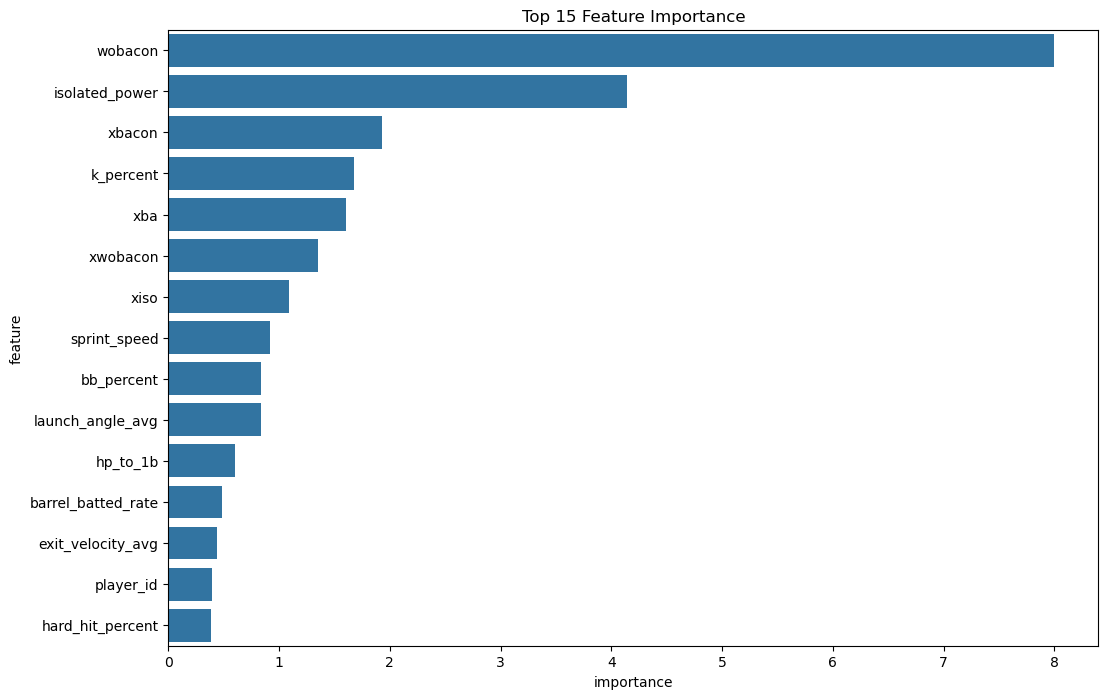

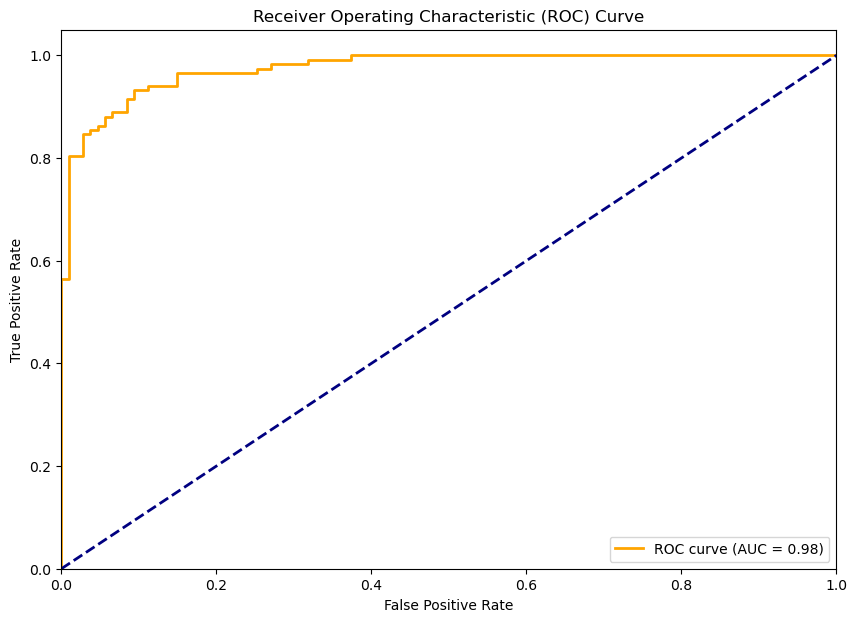

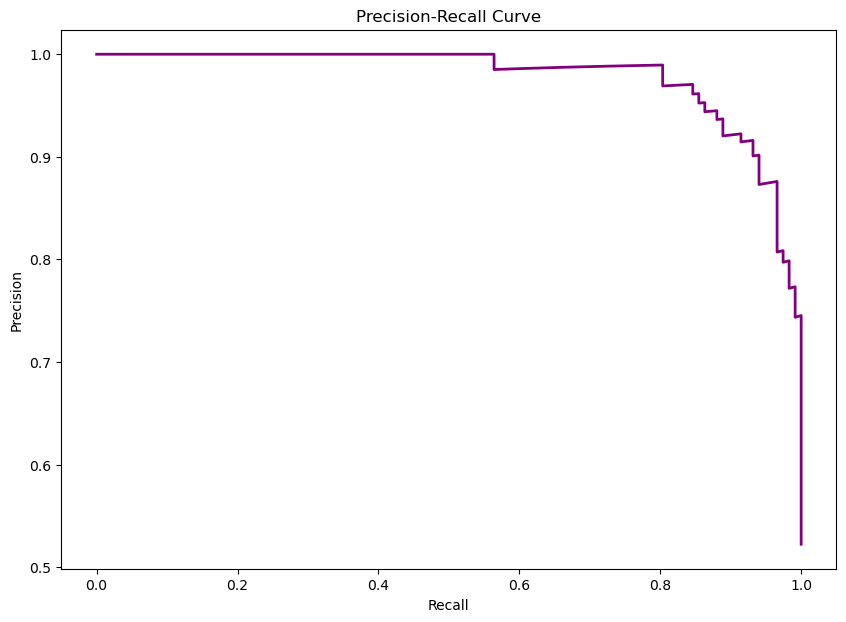

Test Set Performance Metrics:
Accuracy: 0.9062

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       107
           1       0.93      0.89      0.91       117

    accuracy                           0.91       224
   macro avg       0.91      0.91      0.91       224
weighted avg       0.91      0.91      0.91       224

ROC-AUC: 0.9754


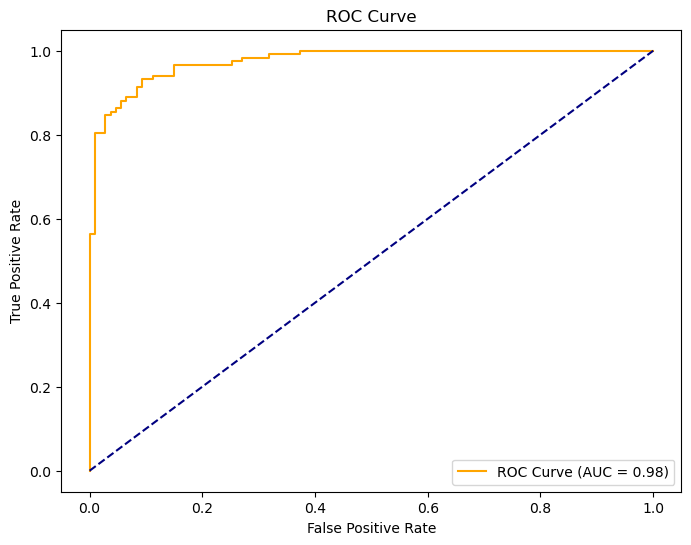

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve  

# 'woba'를 기준으로 이진 분류 타겟 생성 (중앙값 기준)
woba_median = final_data['woba'].median()
final_data['high_woba'] = (final_data['woba'] > woba_median).astype(int)

# 특성과 타겟 분리
X = final_data.drop(['woba', 'high_woba'], axis=1)
y = final_data['high_woba']

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 (L2 정규화)
model = LogisticRegression(penalty='l2', C=1.0, random_state=42)
model.fit(X_train, y_train)

# 교차 검증을 통한 성능 평가
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# 특성 중요도 시각화
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance')
plt.show()

# ROC 곡선
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Calculating ROC-AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Outputting the results
print("Test Set Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_rep)
print(f"ROC-AUC: {roc_auc:.4f}")

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [19]:
# Calculate the proportion of each feature's importance relative to the total importance
feature_importance['importance_ratio'] = feature_importance['importance'] / feature_importance['importance'].sum()

# Display the updated feature importance with ratios in percentage format
feature_importance['importance_ratio'] = feature_importance['importance_ratio'] * 100  # Convert to percentage

print(feature_importance.head(15))

               feature  importance  importance_ratio
6              wobacon    7.998383         30.998379
3       isolated_power    4.139870         16.044402
8               xbacon    1.927337          7.469550
1            k_percent    1.674387          6.489224
4                  xba    1.604924          6.220014
7             xwobacon    1.350962          5.235764
5                 xiso    1.088425          4.218280
18        sprint_speed    0.915548          3.548281
2           bb_percent    0.835195          3.236865
10    launch_angle_avg    0.832118          3.224941
17            hp_to_1b    0.605908          2.348244
12  barrel_batted_rate    0.483160          1.872524
9    exit_velocity_avg    0.434814          1.685155
0            player_id    0.396448          1.536464
13    hard_hit_percent    0.388839          1.506979
